# Pymaceuticals Inc.
---

##Analysis

- Over time, the volume of the tumor decreases with the treatment of Capomulin
- There is a positive correlation: As the weight of the mouse increases, so does the volume of the tumor.
- I would love to have a class conversation of the results and how to best communicate the findings.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#merge_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
merge_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
bad_mice=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
bad_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_filter_s = merge_df["Mouse ID"].isin(bad_mice)
print (bad_mice_filter_s)

bad_mice_df = merge_df.loc[bad_mice_filter_s]
bad_mice_df

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_df[~bad_mice_filter_s]
print(clean_mouse_df.shape)
clean_mouse_df.head()

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()
#clean_mouse_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_mouse_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_avg= clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median= clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var= clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_sd= clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame(
{
    "TUMOR mean": tumor_avg,
    "median": tumor_median,
    "variance": tumor_var,
    "StDev": tumor_sd,
    "sem": tumor_sem
})
summary_df

,TUMOR mean,median,variance,StDev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_df = clean_mouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
tumor_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mouse_count= clean_mouse_df["Drug Regimen"].value_counts()
mouse_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

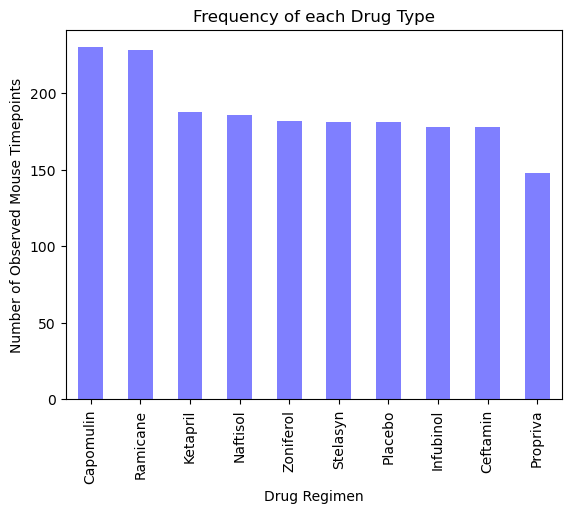

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count= clean_mouse_df["Drug Regimen"].value_counts()
mouse_count.plot.bar(color='blue', alpha=0.5, align="center")

plt.title("Frequency of each Drug Type")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
#plt.xlim(len("Drug Regimen"))
#plt.ylim(0,max(mouse_count)+5)

#plt.bar(x_axis, mouse_count)
plt.show()


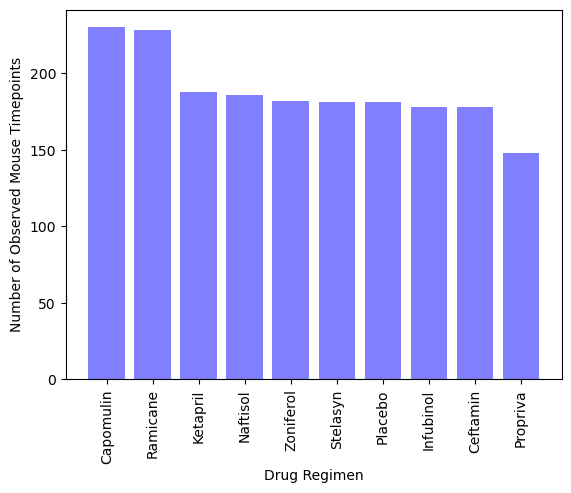

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=mouse_count.index
y=mouse_count.values

plt.bar(x,y, color='blue', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


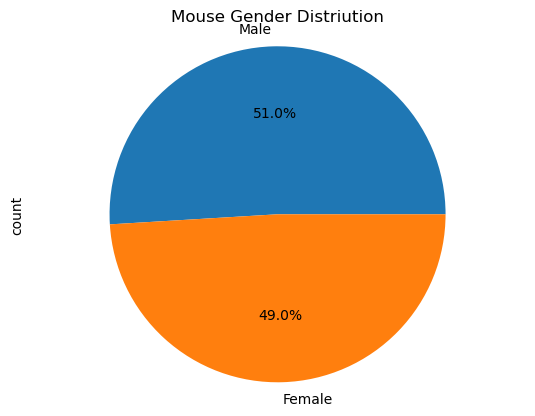

Sex
Male      958
Female    922
Name: count, dtype: int64


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender_s = clean_mouse_df['Sex'].value_counts()
mouse_gender_s.plot(kind='pie',autopct="%1.1f%%")

plt.axis('equal')
plt.title("Mouse Gender Distriution")
plt.show()

print(mouse_gender_s)

In [13]:
mouse_gender_s.values

array([958, 922], dtype=int64)

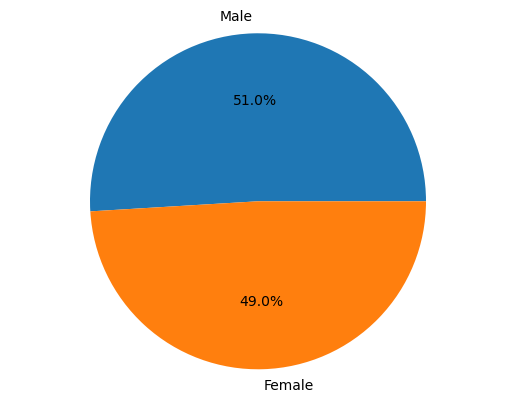

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplots

plt.pie(mouse_gender_s.values, labels=mouse_gender_s.index,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across the four most promising treatment regimens  

#capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin",:]
#ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Ramicane",:]
#infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Ifubinol",:]
#ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_tumor_volume_df = pd.merge(last_timepoint_df, clean_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
print(merge_tumor_volume_df.shape)
merge_tumor_volume_df.head()

(248, 8)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels) 
# Capomulin, Ramicane, Infubinol, and Ceftamin

promising_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol serieses (for plotting)
final_tumor_volumes = []
#For each promising treatment
for drug in promising_treatments:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_volume_s = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    # add the tumor volume series to the final_tumor_volumes list
    final_tumor_volumes.append(drug_volume_s)
    
    # Determine outliers for this drug using IQR, upper, and lower bounds
    quartiles = drug_volume_s.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f" and values above {upper_bound} could be outliers.")


For Capomulin, values below 26.714832162499995 could be outliers.
 and values above 55.9711007025 could be outliers.
For Ramicane, values below 24.1865864625 could be outliers.
 and values above 57.488048122500004 could be outliers.
For Infubinol, values below 32.309217298749985 could be outliers.
 and values above 72.31757996875001 could be outliers.
For Ceftamin, values below 32.81891142624998 could be outliers.
 and values above 71.19095325625001 could be outliers.


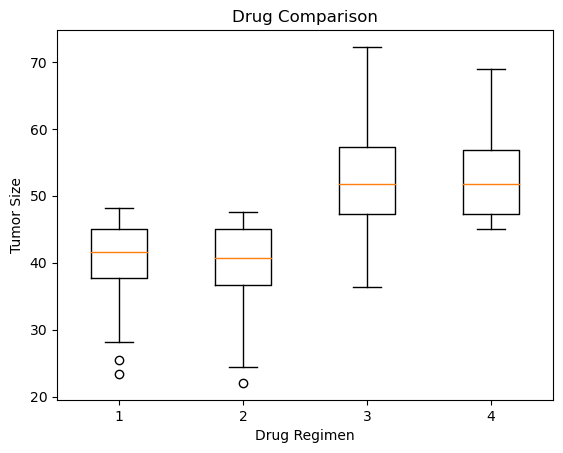

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Comparison')
ax1.set_ylabel('Tumor Size')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(final_tumor_volumes)

## DEBUG Trying to name the ticks with drug names.
for drug in promising_treatments:
    xlabel = (drug)
    plt.xticks=(xlabel)
    plt.show()
#plt.xticks=(["Capomulin","Ramicane","Infubinol","Ceftamin"])
#plt.axes().set_xticks(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()


## Line and Scatter Plots

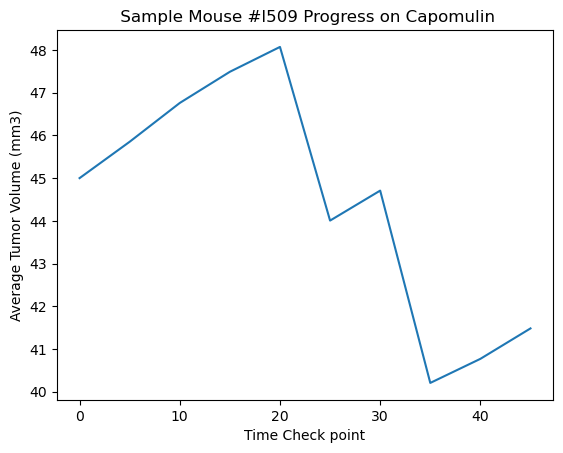

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin", "Mouse ID"].sample(n=1).values[0]
chosen_mouse_df = clean_mouse_df.loc[clean_mouse_df["Mouse ID"]==mouse_ID, ["Tumor Volume (mm3)","Timepoint"]]
x_values = chosen_mouse_df["Timepoint"].values
y_values = chosen_mouse_df["Tumor Volume (mm3)"].values

plt.plot(x_values,y_values)
plt.title(f' Sample Mouse #{mouse_ID} Progress on Capomulin')
plt.xlabel('Time Check point')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

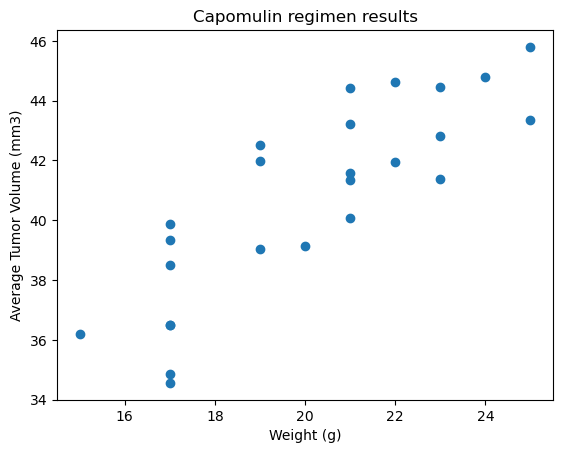

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin",:]
capomulin_avg_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
x_values = capomulin_avg_weight.values
y_values = capomulin_avg_vol.values

plt.scatter(x_values, y_values)
plt.title('Capomulin regimen results')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


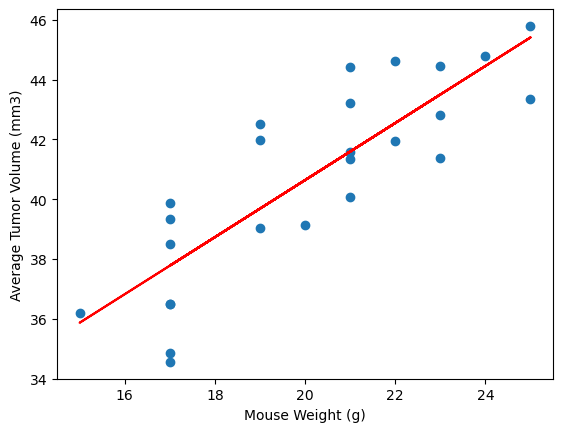

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = capomulin_avg_weight
y = capomulin_avg_vol

correlation_coeff = st.pearsonr(x, y)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coeff}")

vw_slope, vw_int, vw_r, vw_p, vw_std_err = st.linregress(x, y)
vw_fit = vw_slope * capomulin_avg_weight + vw_int

plt.scatter(capomulin_avg_weight, capomulin_avg_vol)
plt.plot(x,vw_fit, color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()